<a href="https://colab.research.google.com/github/barkhaneum/AI_Academy/blob/master/3%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3주차 과제
- 학습률 최적화
- 군집 분석(병합 계층 군집) 구현 클론 코딩
- Cost function 구현

## 1. 학습률 최적화

간단한 예제를 통해 학습률 최적화의 중요성에 대해서 확인 해 보도록 하겠습니다.

아래 링크에서 __1단계만__에 손실 곡선의 최저점에 도달하게 하는 학습률을 찾아 정답을 적어주세요

링크: https://developers.google.com/machine-learning/crash-course/fitter/graph?hl=ko

### 정답 : 1.60


## 2. 군집 분석(병합 계층 군집) 구현 클론 코딩

군집 분석 강의(군집문제[2] 3:10 ~ 5:20 부분)를 보고 코드를 따라 치며 출력 결과(과제 설명 페이지 참고)를 만드세요. 

강의에서는 데이터 시각화까지 진행하지만 
과제에서는 표를 출력하는 것 까지만 하시면 됩니다.

3주차 과제 안내 페이지를 보시면 표에 대한 이미지가 있습니다. 참고해주세요

In [31]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage # 행렬의 완전연결병합방식을 위해 linkage를 사용함 
from scipy.cluster.hierarchy import dendrogram #덴드로그램을 사용하기위함

#1. 모든데이터의 거리행렬을 계산한다.
np.random.seed(123)  
X = np.random.random_sample([5,3]) * 10 #  5 * 3 행렬을 만들고 각각 0~1의 실수(어느정도 거리를 구하기위해)에 10에 곱한값을 넣는다.


variables = ['X','Y','Z']  #열 라벨을 XYZ
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4'] #행라벨을  붙인다.
df = pd.DataFrame(X,columns = variables, index = labels)
df


,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [32]:
Y = pdist(df) # df <- X,Y,Z 축약된 거리행렬
Y

#squareform함수를 통해 거리행렬 벡터를 행렬형식으로 변환해주었음
row_dist = pd.DataFrame(squareform(pdist(df,metric='euclidean')), #거리계산을 일반적으로 사용하는 유클리디안으로 지정
                        columns = labels, index=labels)

#row_clusters = linkage(row_dist, method = 'complete',metric = 'euclidean')
#help(linkage)
#pdist 함수에서 축약된 거리 행렬을 입력 속성으로 사용
#linkage함수에서 초기 데이터 배열을 전달하고 'euclidean'지표를 매개변수로 사용
#위와같이 하면 원한는결과를 얻을수가 없음

#그래서 아래와같은 두가지방식중 하나를 사용해야함
#축약된 거리행렬을 사용하여 원하는 거리행렬을 얻거나
row_clusters = linkage(pdist(df,metric = 'euclidean'), method = 'complete')
#원본 샘플 행렬을 사용해 원하는 연결행렬을 얻어준다.
#row_clusters = linkage(df.values,method = 'complete',metric='euclidean')

#군집 결과를 살펴보기 위해서  pandas Dataframe으로 살펴본다.
#무작위로 생성한 5개의 데이터는 총 4개의 군집을 이루었음
pd.DataFrame(row_clusters, 
             columns = ['row label 1','row label 2', 'distance','no. of items in clust.'],
             index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

#실행했을 때 아래의 표중에 첫번째 두번째열은 완전 연결방식으로 병합된 클러스트를 나타낸다.
#cluster1은 Id_0과 , id_4가 병합되는것을 알수가 있음
#세번째열은 클러스트간의 거리를 의미한다.
#네번째열은 이군집에 속한 데이터의 수를 의미한다.
#3번째 클러스트중에 5.0의 의미는 id_0과 id_4가 병합된 새로운 Id_5라고 생각하면된다.
#3번째 클러스트는 3.0, 5.0의 의미는 id_3,id_5라고 생각하면된다. 그리고 마지막 3.0 의 의미는 이클러스터에 속한 데이터가 3개라는 의미이다.

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


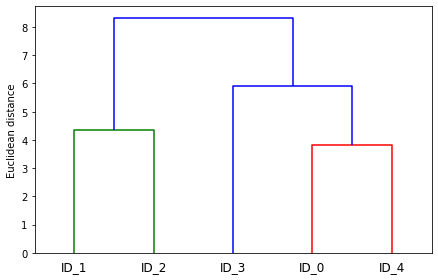

In [33]:
#덴드로 그램함수를 matplot통해 선을 그린다.
row_dendr = dendrogram(row_clusters,
                       labels= labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()


## 3. Cost function 구현
## $$cost(W) =  \frac{1}{n}\sum_{i=1}^n (Wx^{(i)}-y^{(i)})^2$$

### 데이터(X, Y)

In [0]:
# 제공된 데이터는 변경 할 수 없습니다.
x = [1, 2, 3]
y = [2, 4, 6]
#x = [1, 2]
#y = [3, 6]

### cost function을 파이썬으로 구현하세요.
pass를 지우고 cost_func 함수를 완성하세요.

가중치(Weight)를 입력하면 코스트(cost)를 계산하는 함수를 만드는게 목적입니다.

In [43]:
# W(가중치) 데이터 타입 -> int or float
# x(학습 데이터) 데이터 타입 -> list
# y(정답 데이터) 데이터 타입 -> list
# cost_func 함수 리턴값 타입 -> float
# cost_func 함수 리턴값 = cost 값
# W:가중치, x:학습 데이터 y:정답 데이터

def cost_func(W, x, y):
  sig_sum = 0
  for i in range(len(x)):
    sig_sum+=pow(W * x[i] - y[i],2)
  return float(sig_sum/len(x))

#print(cost_func(4,x,y))

18.666666666666668


예시) x가 [1, 2] 이고 y가 [3, 6] 그리고 W가 4 일 경우  cost_func(W, x, y)함수의 리턴값은 2.5

### cost_func을 활용하여 웨이트(Weight)가 -5부터 5까지의 변화에 따른 코스트(cost)를 출력 해주세요.

In [44]:
# 여기 코드셀은 변경하지 마세요.
# 완성된 함수를 확인하는 과정으로 해당 코드셀을 실행해서 정상 출력되면 정답!
# 주의! 에러가 날 경우 데이터 코드셀과 cost function 코드셀을 실행했는지 확인해주세요.
for feed_W in range(-5, 6, 1):
  curr_cost = cost_func(feed_W, x, y)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-5.000 |  228.66667
-4.000 |  168.00000
-3.000 |  116.66667
-2.000 |   74.66667
-1.000 |   42.00000
 0.000 |   18.66667
 1.000 |    4.66667
 2.000 |    0.00000
 3.000 |    4.66667
 4.000 |   18.66667
 5.000 |   42.00000
